# Apple Stock Price
2014-01-01 to 2023-10-31
*italicized text*
https://www.kaggle.com/datasets/rafsunahmad/apple-stock-price/data

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

In [3]:
# link = https://drive.google.com/file/d/1WlohusE8CjFKeE-rPX4cryCupmi4y-Km/view?usp=sharing
id = '1WlohusE8CjFKeE-rPX4cryCupmi4y-Km'
file = drive.CreateFile({'id':id})
file.GetContentFile('APPL.csv')

In [5]:
appl_df = pd.read_csv('APPL.csv', index_col='Date', parse_dates=['Date'])
appl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


# EDA

In [6]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2014-01-02 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2475 non-null   float64
 1   High       2475 non-null   float64
 2   Low        2475 non-null   float64
 3   Close      2475 non-null   float64
 4   Adj Close  2475 non-null   float64
 5   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.4 KB


In [7]:
appl_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


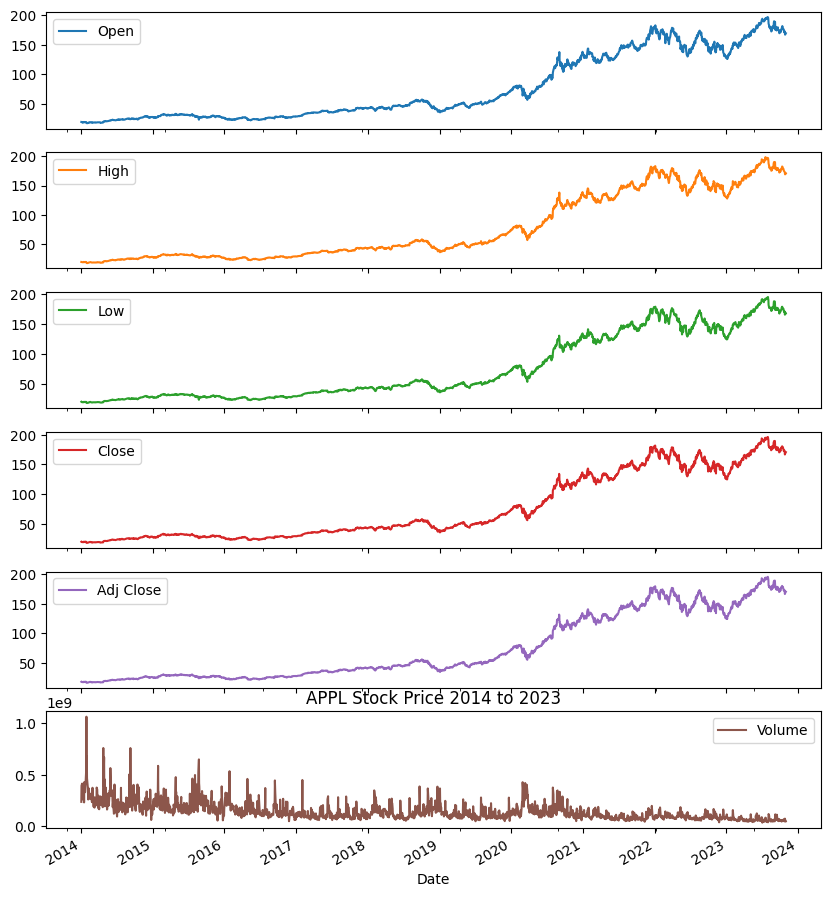

In [9]:
appl_df['2014':'2023'].plot(subplots=True, figsize=(10,12))
plt.title('APPL Stock Price 2014 to 2023')
plt.show()

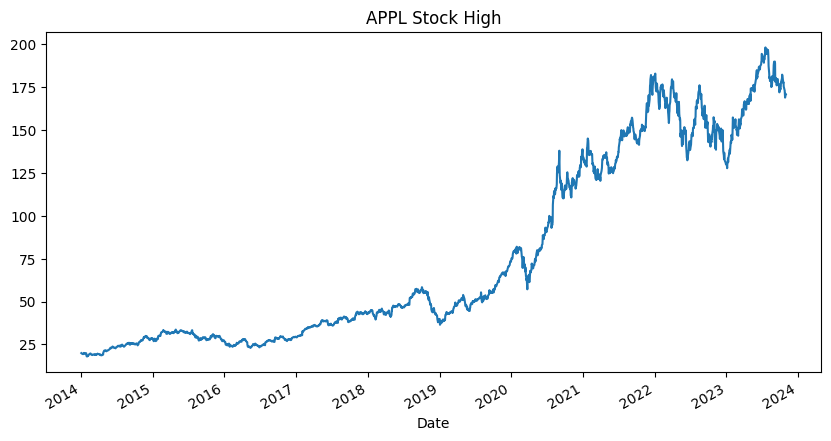

In [10]:
appl_df.High.plot(figsize=(10,5))
plt.title('APPL Stock High')
plt.show()

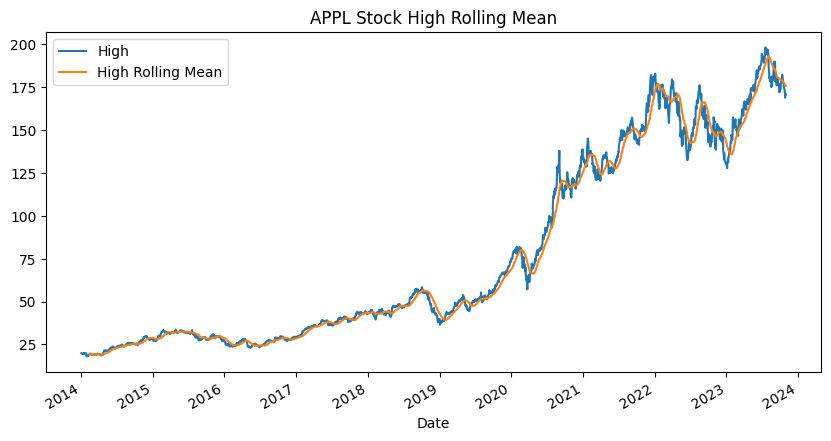

In [12]:
high_rolling_mean = appl_df.High.rolling(window=30).mean()
appl_df.High.plot(figsize=(10,5))
high_rolling_mean.plot()
plt.title('APPL Stock High Rolling Mean')
plt.legend(['High', 'High Rolling Mean'])
plt.show()

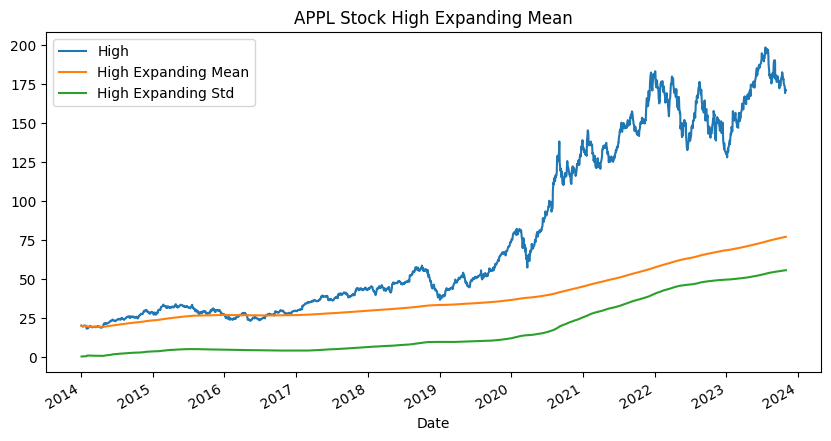

In [13]:
high_expand_mean = appl_df.High.expanding().mean()
high_expand_std = appl_df.High.expanding().std()
appl_df.High.plot(figsize=(10,5))
high_expand_mean.plot()
high_expand_std.plot()
plt.title('APPL Stock High Expanding Mean')
plt.legend(['High', 'High Expanding Mean', 'High Expanding Std'])
plt.show()

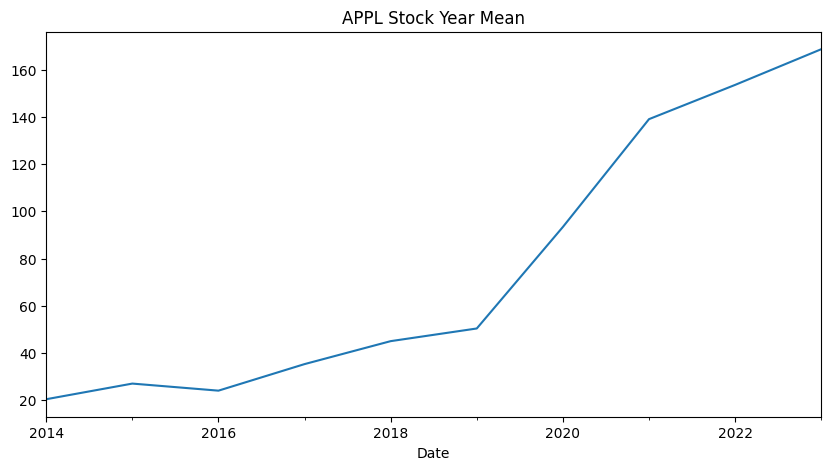

In [14]:
appl_df['Adj Close'].resample('Y').mean().plot(figsize=(10,5))
plt.title('APPL Stock Year Mean')
plt.show()

In [15]:
appl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


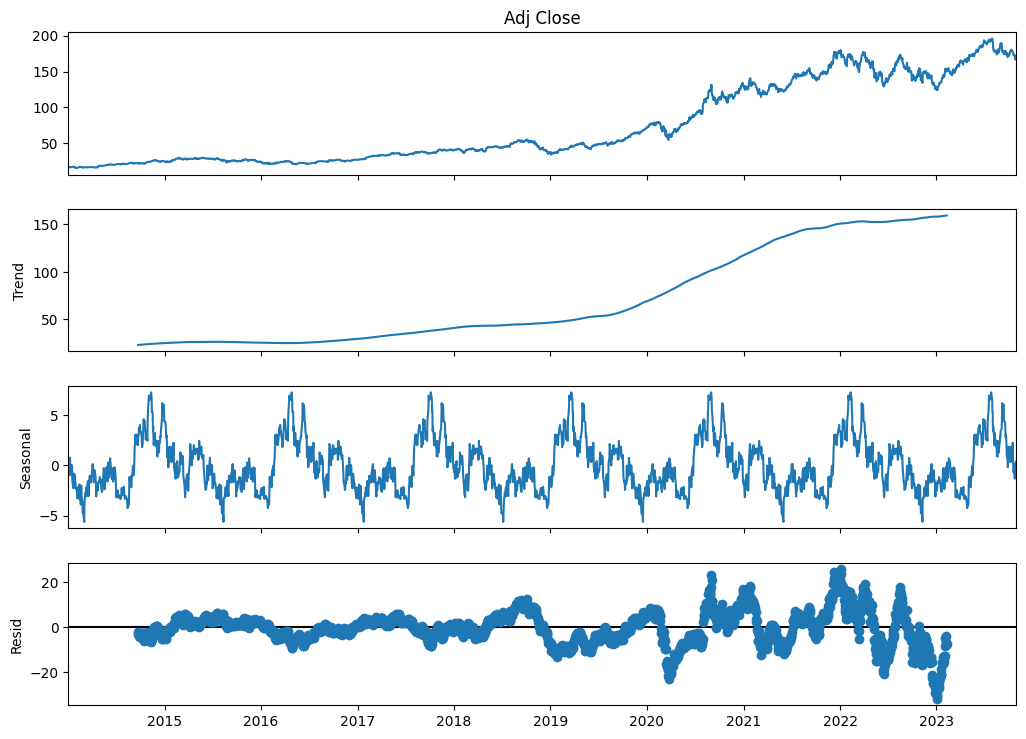

In [16]:
decompose = sm.tsa.seasonal_decompose(appl_df['Adj Close'], model='additive', period=365)
decompose.plot().set_size_inches(11, 8)
plt.show()

In [17]:
decompose.resid.isnull().sum()

364

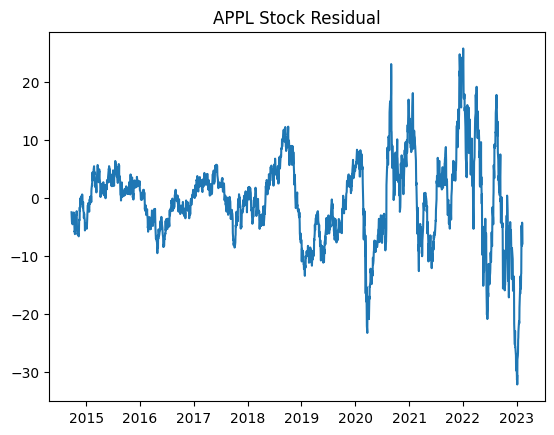

In [18]:
resid = decompose.resid
resid = resid.dropna()

plt.plot(resid)
plt.title('APPL Stock Residual')
plt.show()

In [19]:
ADF_residule = sm.tsa.stattools.adfuller(resid)
print('ADF Statistic: %f' % ADF_residule[0])
print('p-value: %f' % ADF_residule[1])
print('Critical Values:')
for key, value in ADF_residule[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.338243
p-value: 0.000005
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


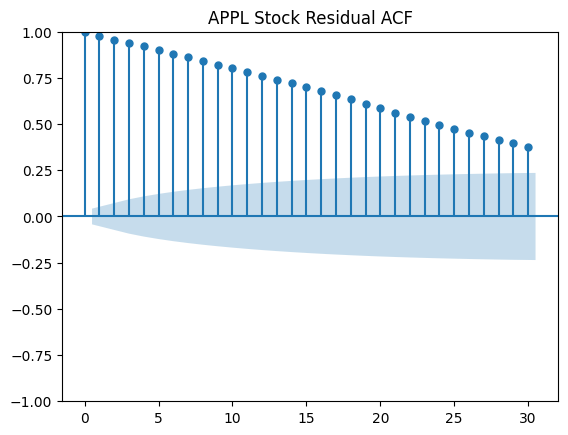

In [20]:
plot_acf(resid, lags=30)
plt.title('APPL Stock Residual ACF')
plt.show()

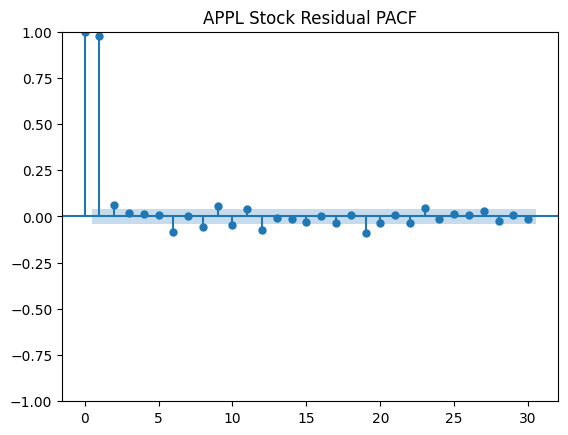

In [21]:
plot_pacf(resid, lags=30)
plt.title('APPL Stock Residual PACF')
plt.show()

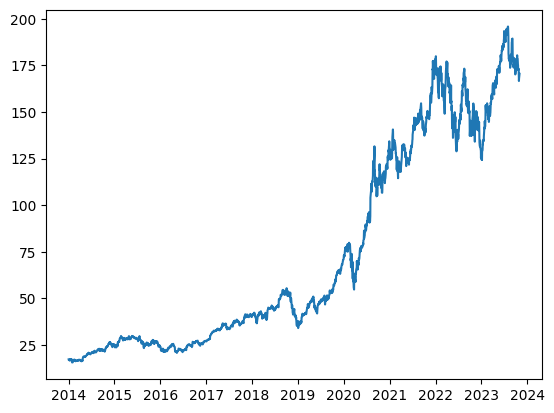

In [22]:
plt.plot(appl_df['Adj Close'].dropna())

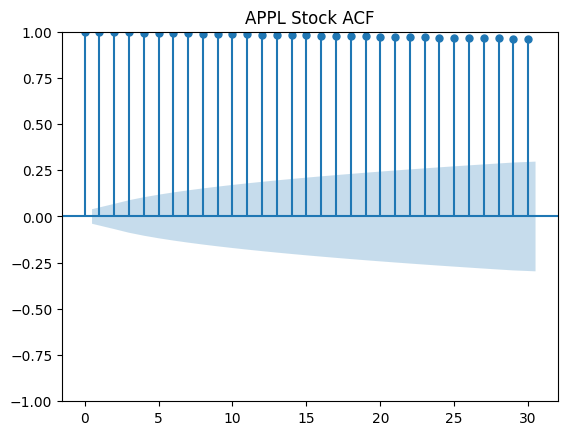

In [23]:
plot_acf(appl_df['Adj Close'].dropna(), lags=30)
plt.title('APPL Stock ACF')
plt.show()

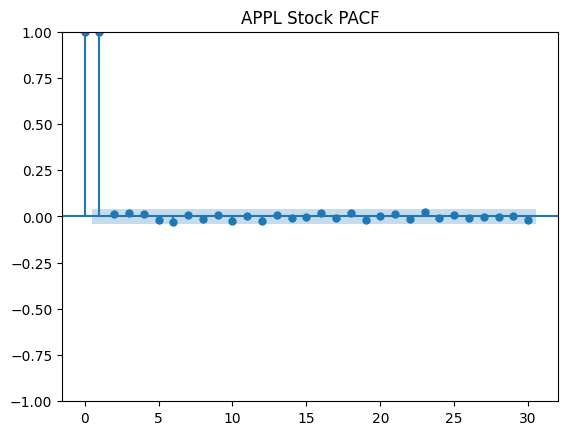

In [24]:
plot_pacf(appl_df['Adj Close'].dropna(), lags=30)
plt.title('APPL Stock PACF')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


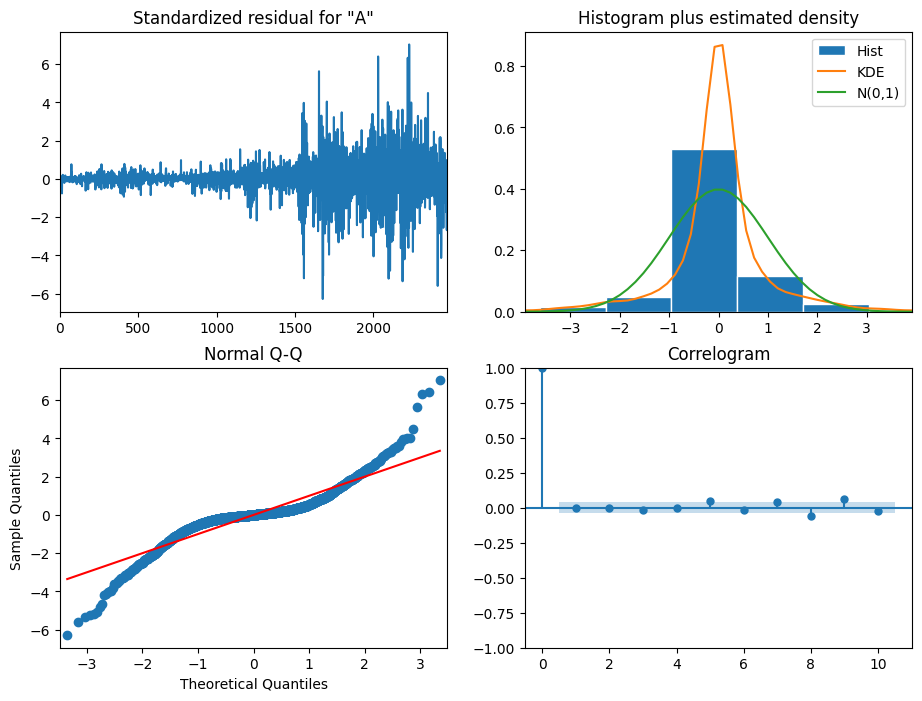

In [25]:
model = sm.tsa.statespace.SARIMAX(appl_df['Adj Close'].dropna(), order=(2,3,2)) # p, d, q
results = model.fit()
results.plot_diagnostics(figsize=(11,8))
plt.show()

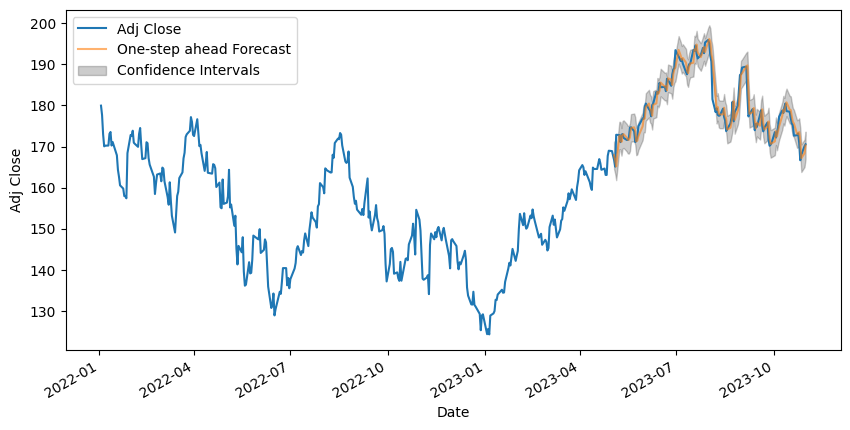

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-03'), dynamic=False)
pred_ci = pred.conf_int()
ax = appl_df['Adj Close']['2022':].plot(figsize=(10,5))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.6)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.2, label='Confidence Intervals')
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
plt.legend()
plt.show()

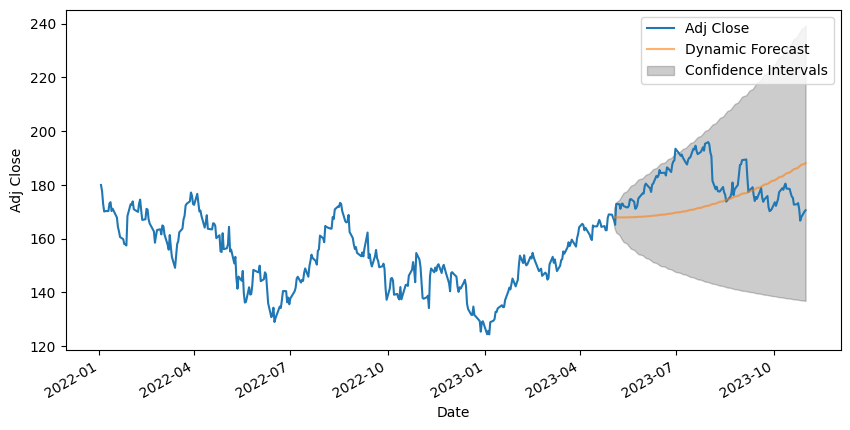

In [30]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2023-05-03'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()
ax = appl_df['Adj Close']['2022':].plot(figsize=(10,5))
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.6)
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:,0], pred_dynamic_ci.iloc[:,1], color='k', alpha=.2, label='Confidence Intervals')
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
plt.legend()
plt.show()